In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import sys
sys.path.insert(0,"../../project_1/src/")
sys.path.insert(0,"../src/")

import NeuralNetwork as NN
from CostFunctions import *
from ActivationFunctions import *
from analysis_utils import *

import utils

from imageio import imread

# Quick and easy way to get rid of sci-kit learns warning messages when
# doing gradient descent.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


utils.plot_settings()  # LaTeX fonts in Plots!

FIGPATH = "../figs/"
FIGURESIZE= np.array([4,3]) # Good default figure size for tex documents

SEEDVAL = 2020

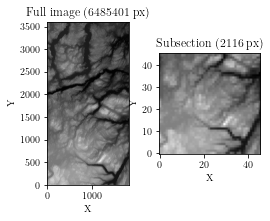

In [2]:
# Setting up the terrain data:
# Note structure! X-coordinates are on the rows of terrain_data
# Point_selection.flatten() moves most rapidly over the x-coordinates
# Meshgrids flattened also move most rapidly over the x-coordinates. Thus
# this should make z(x,y).reshape(length_y,length_x) be consistent with terrain_data

np.random.seed(SEEDVAL)
terrain_data = imread("../../project_1/datafiles/SRTM_data_Norway_1.tif")
point_selection = terrain_data[:1801:40, :1801:40]  # Make quadratic and downsample
x_terrain_selection = np.linspace(0, 1, point_selection.shape[1])
y_terrain_selection = np.linspace(0, 1, point_selection.shape[0])
X_coord_selection, Y_coord_selection = np.meshgrid(x_terrain_selection, y_terrain_selection)
z_terrain_selection = point_selection.flatten()  # the response values
x_terrain_selection_flat = X_coord_selection.flatten()  # the first degree feature variables
y_terrain_selection_flat = Y_coord_selection.flatten()  # the first degree feature variables

x = x_terrain_selection_flat
y = y_terrain_selection_flat
z = z_terrain_selection


x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=0.2)

xy_train = np.array([x_train, y_train]).T
xy_test = np.array([x_test, y_test]).T
xy_full = np.array([x, y]).T

# Centering
z_intercept = np.mean(z)
z = z - z_intercept

z_train_intercept = np.mean(z_train)
z_train = z_train - z_train_intercept
z_test = z_test - z_train_intercept

z_train = z_train.reshape(-1, 1)
z_test = z_test.reshape(-1, 1)
z_full = z.reshape(-1, 1)

# Show the terrain
plt.figure(figsize=FIGURESIZE)
plt.subplot(121)
plt.title(f"Full image ({terrain_data.size} px)")
plt.imshow(terrain_data, cmap="gray", origin="lower")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(122)
plt.imshow(point_selection, cmap="gray", origin="lower")
plt.title(f"Subsection ({point_selection.size} px)")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig(FIGPATH+"TerrainData.pdf")
plt.show()

In [3]:
tot_epochs = 500

penalties = np.array([1e-5, 1e-7, 1e-9])
learning_rate = np.array([1e-5, 1e-6, 1e-7])

N_penalties = len(penalties)
N_learning_rate = len(learning_rate)

Sigmoid_MSE = np.zeros([N_penalties, N_learning_rate])
ReLU_MSE = np.zeros([N_penalties, N_learning_rate])
LeakyReLU_MSE = np.zeros([N_penalties, N_learning_rate])

In [4]:
for j in range(N_penalties):
    for k in range(N_learning_rate):
        FFNN_score_func = generate_FFNN_score_func(
                N_minibatches=int(len(xy_train)/32),
                learning_rate = learning_rate[k],
                n_epochs = tot_epochs,
                network_shape = [50, 50],
                activation = Sigmoid,
                activation_out = ID,
                lambd = penalties[j],
                init_weights_method = "xavier"
            )

        Sigmoid_MSE[j,k] = CrossValidation(xy_full, z_full, FFNN_score_func, 5)

Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights

In [5]:
for j in range(N_penalties):
    for k in range(N_learning_rate):
        FFNN_score_func = generate_FFNN_score_func(
                N_minibatches=int(len(xy_train)/32),
                learning_rate = learning_rate[k],
                n_epochs = tot_epochs,
                network_shape = [50, 50, 50],
                activation = ReLU,
                activation_out = ID,
                lambd = penalties[j],
                init_weights_method = "he"
            )

        ReLU_MSE[j,k] = CrossValidation(xy_full, z_full, FFNN_score_func, 5)

Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initiali

In [6]:
for j in range(N_penalties):
    for k in range(N_learning_rate):
        FFNN_score_func = generate_FFNN_score_func(
                N_minibatches=int(len(xy_train)/32),
                learning_rate = learning_rate[k],
                n_epochs = tot_epochs,
                network_shape = [50, 50, 50],
                activation = LeakyReLU,
                activation_out = ID,
                lambd = penalties[j],
                init_weights_method = "he"
            )

        LeakyReLU_MSE[j,k] = CrossValidation(xy_full, z_full, FFNN_score_func, 5)

Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initiali

In [17]:
#plt.figure(figsize=(4, 3))
x = np.log10(penalties)
y = np.log10(learning_rate)
X, Y = np.meshgrid(x, y)
#plt.savefig(FIGPATH + f"LASSO_CV_Franke_contour_N_{n}.pdf")

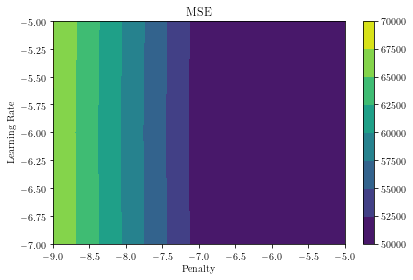

In [18]:
plt.contourf(X, Y, LeakyReLU_MSE)
plt.colorbar()
plt.ylabel("Learning Rate")
plt.xlabel("Penalty")
plt.title("MSE")
plt.tight_layout()

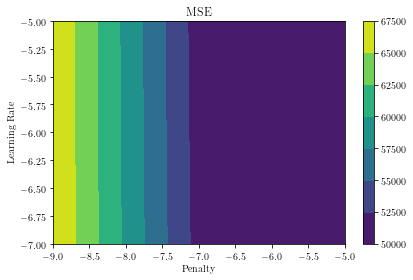

In [19]:
plt.contourf(X, Y, ReLU_MSE)
plt.colorbar()
plt.ylabel("Learning Rate")
plt.xlabel("Penalty")
plt.title("MSE")
plt.tight_layout()

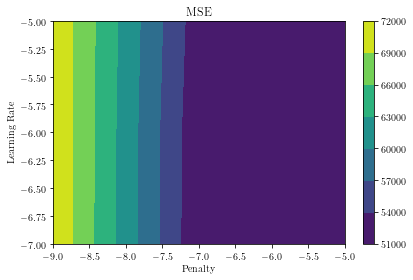

In [20]:
plt.contourf(X, Y, Sigmoid_MSE)
plt.colorbar()
plt.ylabel("Learning Rate")
plt.xlabel("Penalty")
plt.title("MSE")
plt.tight_layout()

In [7]:
LeakyReLU_MSE

array([[51498.03020822, 51489.79752515, 67662.13191601],
       [51323.43754229, 51357.26895565, 67482.68463776],
       [51388.44350768, 51485.6097073 , 67580.1508485 ]])

In [12]:
ReLU_MSE

array([[51499.95863856, 51325.35892754, 67426.55809509],
       [51536.57058054, 51443.999876  , 67449.20074226],
       [51439.56249789, 51584.36845222, 67486.33044308]])

In [13]:
Sigmoid_MSE

array([[51579.7562648 , 52208.83712618, 71711.34963903],
       [51502.79165458, 51661.41886463, 71705.81064036],
       [51554.3372852 , 51555.56741479, 71723.27515166]])